In [24]:
import os
import pandas as pd
import numpy as np

import csv
import glob

combined_data = {}

metric_targets = [ "ipc", "inst", "write", "read" ]
bench_targets = [ "gaussian" ]

for filen in glob.glob("*.csv"):
    
    filen_split = filen.split('.')[0].split('_')
    bench_name = filen_split[0]
    metric_name = filen_split[1]
    size_str = filen_split[2].split('N')[1]
    
    if not (metric_name in metric_targets): continue
    if not (bench_name in bench_targets): continue
    
    key_root = bench_name+"_"+size_str
    #print(key_root)
    
    # Now open the file and look for the data
    with open(filen ,'r') as file_handle:
        
        data_found = False
        ncols = 1
        fdata = csv.reader(file_handle)
        index_lookup = {}
        
        for line_split in fdata:
            
            lsplt = (len(line_split) > 0)

            if data_found:
                
                if lsplt and len(line_split) == ncols:
                    
                    # Read in desired value for the current metric
                    target_index = index_lookup['Avg']; value = 0
                    if metric_name == "ipc":
                        value = float(line_split[ target_index ])
                    elif metric_name == "inst":
                        value = int(line_split[ target_index ])
                    elif metric_name == "write" or metric_name == "read":
                        # Just take the first 
                        units = line_split[ target_index ][-4:-2]
                        mfact = 1.0
                        if   units == "KB": mfact = 1024
                        elif units == "MB": mfact = 1024*1024
                        elif units == "GB": mfact = 1024*1024*1024
                        value = float(line_split[ target_index ][0:7]) * mfact
                            
                    else:
                        value = float(line_split[ target_index ])
                    
                    # Parse name of kernel
                    kernel_name = line_split[ index_lookup['Kernel'] ].split('(')[0]
                    
                    # Define kernel-specific key
                    key = key_root + "_" + kernel_name
                    
                    # Initialize dict for this key, if it is new
                    if not (key in combined_data): 
                        combined_data [ key ] = {}
                        combined_data [ key ][ 'size' ] = int( size_str )
                    
                    # Store value for the metric being read right now
                    combined_data [ key ][ metric_name ] = value
                    
                else: data_found = False


            elif lsplt and line_split[0] == 'Device' and line_split[1] == 'Kernel':
                # Set flag that we are at the data:
                data_found = True
                # Set number of columns in table:
                ncols = len(line_split)
                # Generate an index lookup table:
                idx = 0
                for term in line_split:
                    index_lookup[term] = idx
                    idx += 1
                    
print(combined_data)

{'gaussian_128_Fan2': {'size': 128, 'inst': 29204, 'ipc': 0.247975, 'read': 0.0, 'write': 36009987.2768}, 'gaussian_128_Fan1': {'size': 128, 'inst': 295, 'ipc': 0.218697, 'read': 0.0, 'write': 52388429.824}, 'gaussian_256_Fan2': {'size': 256, 'inst': 115057, 'ipc': 0.286587, 'read': 0.0, 'write': 9219992.45312}, 'gaussian_256_Fan1': {'size': 256, 'inst': 377, 'ipc': 0.275554, 'read': 0.0, 'write': 51264670.9248}, 'gaussian_384_Fan2': {'size': 384, 'inst': 257572, 'ipc': 0.295451, 'read': 0.0, 'write': 8056219.89376}, 'gaussian_384_Fan1': {'size': 384, 'inst': 530, 'ipc': 0.362431, 'read': 0.0, 'write': 50955550.72}, 'gaussian_512_Fan2': {'size': 512, 'inst': 456748, 'ipc': 0.296383, 'read': 0.0, 'write': 4884780.81024}, 'gaussian_512_Fan1': {'size': 512, 'inst': 541, 'ipc': 0.343225, 'read': 0.0, 'write': 48165919.1296}, 'gaussian_640_Fan2': {'size': 640, 'inst': 712585, 'ipc': 0.301159, 'read': 0.0, 'write': 3217408.65536}, 'gaussian_640_Fan1': {'size': 640, 'inst': 814, 'ipc': 0.3307

                    size      inst       ipc  read         write
gaussian_1024_Fan1  1024      1060  0.344930   0.0  4.434197e+07
gaussian_1024_Fan2  1024   1820065  0.296206   0.0  1.292506e+06
gaussian_1152_Fan1  1152      1334  0.318047   0.0  4.263604e+07
gaussian_1152_Fan2  1152   2302548  0.281741   0.0  1.004891e+06
gaussian_1280_Fan1  1280      1416  0.319452   0.0  4.185192e+07
gaussian_1280_Fan2  1280   2841692  0.277621   0.0  8.025395e+05
gaussian_128_Fan1    128       295  0.218697   0.0  5.238843e+07
gaussian_128_Fan2    128     29204  0.247975   0.0  3.600999e+07
gaussian_1408_Fan1  1408      1499  0.313090   0.0  4.102627e+07
gaussian_1408_Fan2  1408   3437497  0.274817   0.0  6.574193e+05
gaussian_1536_Fan1  1536      1580  0.307805   0.0  4.031450e+07
gaussian_1536_Fan2  1536   4089964  0.283320   0.0  5.592013e+05
gaussian_1664_Fan1  1664      1854  0.294217   0.0  3.971964e+07
gaussian_1664_Fan2  1664   4799092  0.287270   0.0  4.822712e+05
gaussian_1792_Fan1  1792 

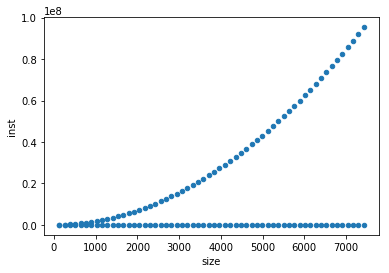

In [31]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame.from_dict(combined_data,orient="index")
print (df)
df.plot(x='size', y='inst', kind='scatter')